In [1]:
import pandas as pd
import numpy as np

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
AODV_star = pd.read_csv('AODV-star.csv')
AODV_mesh = pd.read_csv('AODV-mesh.csv')
DSDV_star = pd.read_csv('DSDV-star.csv')
DSDV_mesh= pd.read_csv('DSDV-mesh.csv')
OLSR_star = pd.read_csv('OLSR-star.csv')
OLSR_mesh = pd.read_csv('OLSR-mesh.csv')

In [14]:
AODV_star

,FlowID,Source,Destination,TxBytes,RxBytes,Throughput(Mbps),PacketDeliveryRatio(%),EndToEndDelay(ms),PacketsDropped,Jitter(ms)
0,1,10.1.1.2,10.1.6.2,8416,8416,0.009608,100,8.7750,0,1.4022
1,2,10.1.1.1,10.1.1.2,48,48,0.184615,100,2.0800,0,0.0000
2,3,10.1.6.1,10.1.6.2,48,48,0.184615,100,2.0800,0,0.0000
3,4,10.1.1.2,10.1.1.1,30,30,0.117005,100,2.0512,0,0.0000
4,5,10.1.6.2,10.1.1.2,8416,8416,0.009624,100,7.3728,0,0.0000


In [15]:
import matplotlib.pyplot as plt

# Calculate the average values for each metric
protocols = ['AODV', 'DSDV', 'OLSR']
topologies = ['star', 'mesh']

throughput_averages = [
    AODV_star['Throughput(Mbps)'].mean(), AODV_mesh['Throughput(Mbps)'].mean(),
    DSDV_star['Throughput(Mbps)'].mean(), DSDV_mesh['Throughput(Mbps)'].mean(),
    OLSR_star['Throughput(Mbps)'].mean(), OLSR_mesh['Throughput(Mbps)'].mean()
]

delay_averages = [
    AODV_star['EndToEndDelay(ms)'].mean(), AODV_mesh['EndToEndDelay(ms)'].mean(),
    DSDV_star['EndToEndDelay(ms)'].mean(), DSDV_mesh['EndToEndDelay(ms)'].mean(),
    OLSR_star['EndToEndDelay(ms)'].mean(), OLSR_mesh['EndToEndDelay(ms)'].mean()
]

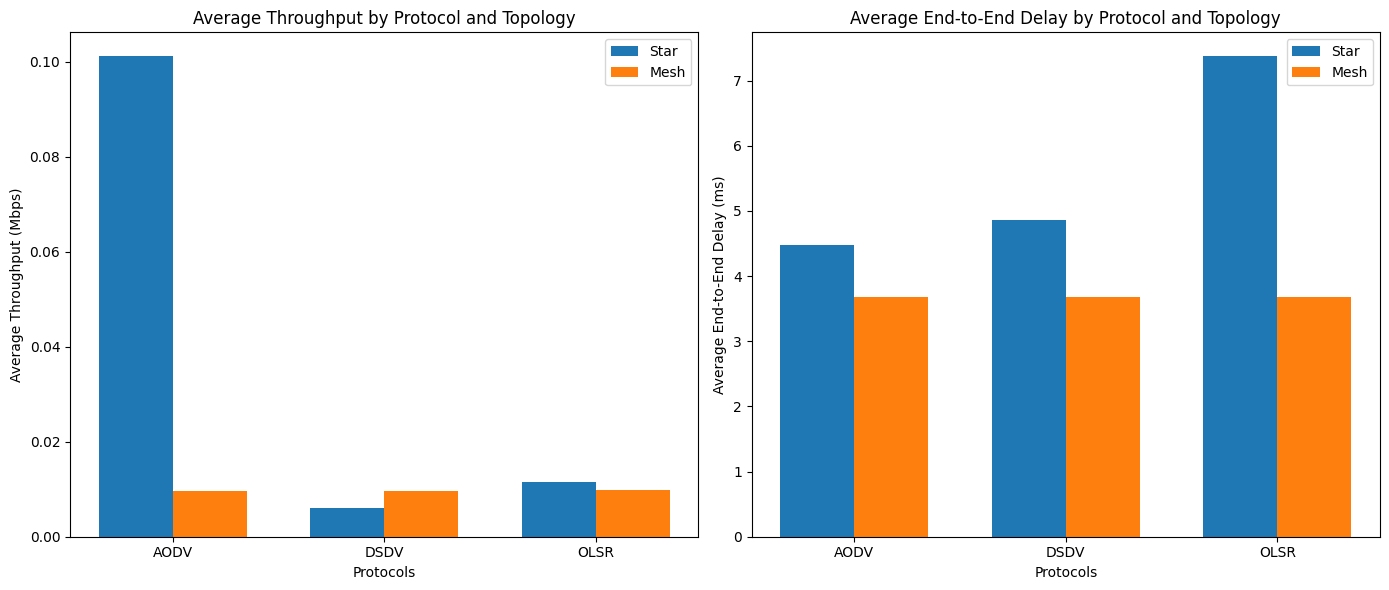

In [20]:
# Create bar plots
x = np.arange(len(protocols))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Throughput
rects1 = ax1.bar(x - width/2, throughput_averages[::2], width, label='Star')
rects2 = ax1.bar(x + width/2, throughput_averages[1::2], width, label='Mesh')

ax1.set_xlabel('Protocols')
ax1.set_ylabel('Average Throughput (Mbps)')
ax1.set_title('Average Throughput by Protocol and Topology')
ax1.set_xticks(x)
ax1.set_xticklabels(protocols)
ax1.legend()

# Plot for End-to-End Delay
rects3 = ax2.bar(x - width/2, delay_averages[::2], width, label='Star')
rects4 = ax2.bar(x + width/2, delay_averages[1::2], width, label='Mesh')

ax2.set_xlabel('Protocols')
ax2.set_ylabel('Average End-to-End Delay (ms)')
ax2.set_title('Average End-to-End Delay by Protocol and Topology')
ax2.set_xticks(x)
ax2.set_xticklabels(protocols)
ax2.legend()

# Show the plots
plt.tight_layout()
plt.savefig('Parameter_comparison.png')
plt.show()